# Introduction

The goal of this project is to investigate the survival rate of the passengers travelling on the titanic ship, and determine which factors affect the survival rate of the passengers. Below are the questions that would be investigated by the end of the analysis:

1) What is the ratio of female survivors when compared to male survivors?

2) What is the ratio of first class vs second class vs third class survivors?

3) Investigating and depicting the number of passengers who survived vs who didn't by each class?

4) Which families have the highest number of survivors?

# Load Data from CSVs

The first step in the process would be to load the data from the CSV file into our data dictionary. I will be using unicodecsv library to import the data from the CSV file

In [5]:
import unicodecsv

def read_csv_file(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

### Importing data from CSV using Pandas library

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data_pandas = pd.read_csv('titanic-data.csv')

print titanic_data_pandas.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


/home/ravi/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [8]:
print titanic_data_pandas

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

# Data Wrangling Phase

Once the CSV data is imported into the lists, the data needs to be fixed and the data needs to be converted into their respective data types. 

## Fixing data types

### Fixing data types using Python lists

In [9]:
# Takes string with values 0 or 1, 
# and returns a boolean True or False
def parse_int_to_boolean(i):
    if i == 1:
        return True
    elif i == 0:
        return False

# Takes the name of the passenger, and returns the first name and last name
# as a list. This function also removes the Mr., Mrs., Miss, Master titles given to the person, 
# and it also crops out everything provided in brackets
def parse_first_and_last_names(name):
    
    #Splits the name by a comma
    first_last_names = name.split(",")
    
    #Splits the first name by ". "
    first_last_names[1] = first_last_names[1].split(". ")[1]
    
    #If the name contains anything in brackets, they are ignored
    if '(' in first_last_names[1]:
        first_last_names[1] = first_last_names[1].split(" (")[0]
    return first_last_names[0], first_last_names[1]

# Takes the sex as male or femal, and returns a single character 'M' or 'F'
def parse_sex(sex):
    if 'male' == sex:
        return 'M'
    else:
        return 'F'

def get_last_names(name):
    return name[0]

In [10]:
titanic_data_pandas['Name'] = titanic_data_pandas['Name'].map(parse_first_and_last_names)
titanic_data_pandas['Sex'] = titanic_data_pandas['Sex'].map(parse_sex)


In [11]:
titanic_data_pandas['Survived'] = titanic_data_pandas['Survived'].map(parse_int_to_boolean)

In [12]:
titanic_data_pandas['Last Name'] = titanic_data_pandas['Name'].map(get_last_names)

In [13]:
print titanic_data_pandas

     PassengerId Survived  Pclass                                  Name Sex  \
0              1    False       3                 (Braund, Owen Harris)   M   
1              2     True       1               (Cumings, John Bradley)   F   
2              3     True       3                    (Heikkinen, Laina)   F   
3              4     True       1             (Futrelle, Jacques Heath)   F   
4              5    False       3                (Allen, William Henry)   M   
5              6    False       3                        (Moran, James)   M   
6              7    False       1                 (McCarthy, Timothy J)   M   
7              8    False       3              (Palsson, Gosta Leonard)   M   
8              9     True       3                    (Johnson, Oscar W)   F   
9             10     True       2                    (Nasser, Nicholas)   F   
10            11     True       3           (Sandstrom, Marguerite Rut)   F   
11            12     True       1                  (

# Exploration and Communication Phase

I am now going to analyze the titanic data by asking questions from the data, and answering them using the data analysis tools in python. The analyzed results presented and displayed below.

## 1. The ratio of male to female survivors

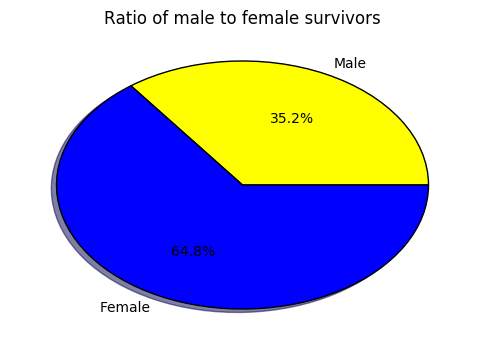

In [14]:
import matplotlib.pyplot as plt

male_female_survivors = titanic_data_pandas.groupby('Sex')['Survived'].count()
labels = 'Male', 'Female'
colors = ['yellow', 'blue']
plt.title('Ratio of male to female survivors')
plt.pie(male_female_survivors, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True)
plt.show()

## 2. The ratio of first, second and third class survivors

In [19]:
# This function is used to print the number of first, second, and third class passengers along side the % values
def make_autopct(values):
  def my_autopct(pct):
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
  return my_autopct

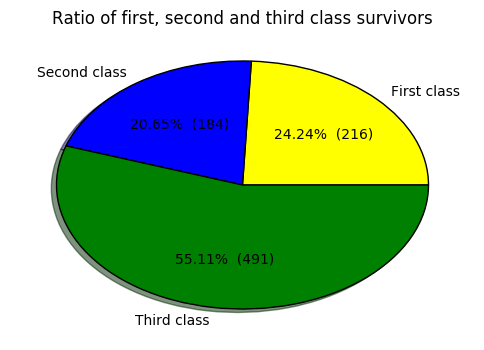

In [20]:
first_second_third_class_survivors = titanic_data_pandas.groupby('Pclass')['Survived'].count()

labels = 'First class', 'Second class', 'Third class'
colors = ['yellow', 'blue', 'Green']
plt.title('Ratio of first, second and third class survivors')
plt.pie(first_second_third_class_survivors, labels = labels, colors = colors, shadow=True, 
        autopct = make_autopct(first_second_third_class_survivors))
plt.show()

## 3. The ratio of passengers who survived vs those who didn't in first, second and third classes

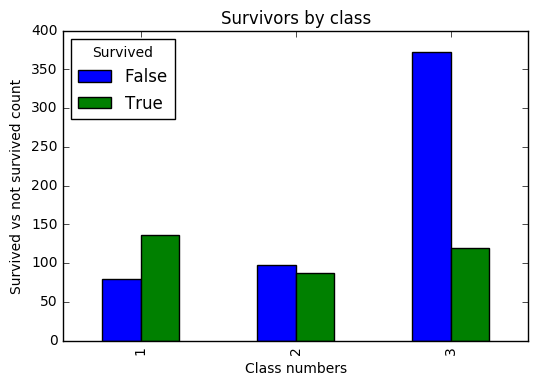

In [12]:
each_class_survivors = titanic_data_pandas.groupby(['Survived', 'Pclass']).size().unstack('Survived').fillna(False)

each_class_survivors[[0, 1]].plot(kind='bar')
plt.title('Survivors by class')
plt.xlabel('Class numbers')
plt.ylabel('Survived vs not survived count')
plt.show()

## 4. Survived passengers grouped by last name

The below graph looks ugly, but it provides the family details of the passengers who survived. Using this information, we can estimate which family has the highest number of survivals and which family has fewer survivors from the titanic incident.

In [47]:
def print_top25_passengers_survived_last_names():
    survivors_by_last_name = titanic_data_pandas.groupby('Last Name')['Survived'].count().sort_values(ascending=False)
    top_25_last_names_survived = survivors_by_last_name.head(25)
    top_25_last_names_survived.plot(kind='bar')
    plt.title('Number of survivors by last name')
    plt.ylabel('Number of passengers survived')
    plt.show()

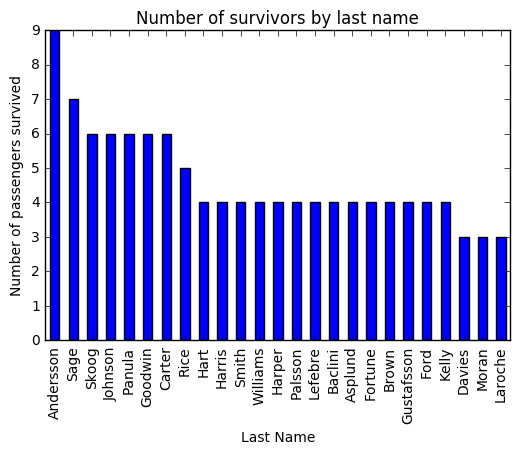

In [48]:
print_top10_passengers_survived_last_names()